<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-dipti/Exercises/day-13/AI-Ethics/AI-Ethics-Practice-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **Problem Set: AI Ethics and Core Principles with Larger Dataset**

This lab will help you practice **Fairness, Transparency, Accountability, Privacy, Safety/Reliability, and Inclusivity** using a **synthetic dataset** included below.

***

### **Dataset Creation**

Run the code below to generate your dataset in Colab. It simulates 1000 loan applications.

```python
import pandas as pd
import numpy as np


# Set random seed for reproducibility
np.random.seed(42)


# Possible values for categorical features
genders = ["Male", "Female", "Other"]
ethnicities = ["White", "Black", "Asian", "Hispanic", "Other"]


# Generate dataset
n = 1000
data = pd.DataFrame({
    "Applicant_ID": range(1, n+1),
    "Age": np.random.randint(18, 70, n),
    "Gender": np.random.choice(genders, n, p=[0.48, 0.48, 0.04]),
    "Ethnicity": np.random.choice(ethnicities, n, p=[0.4, 0.2, 0.2, 0.15, 0.05]),
    "Income": np.random.randint(20, 150, n),  # Annual income in thousands
    "Credit_Score": np.random.randint(300, 851, n),
    "Loan_Amount": np.random.randint(5, 100, n),  # Loan requested in thousands
})


# Introduce a pattern: approval more likely with high credit score & income
data["Loan_Approved"] = np.where(
    (data["Credit_Score"] > 650) & (data["Income"] > 50),
    np.random.choice([1, 0], n, p=[0.8, 0.2]),
    np.random.choice([1, 0], n, p=[0.3, 0.7])
)


# Preview dataset
data.head()
```


***

### **Your Tasks**

#### **1. Fairness**

- Calculate loan approval rates by **Gender** and **Ethnicity**.
- Identify disparities and discuss causes.
- Suggest 2–3 techniques to reduce bias.

***

#### **2. Transparency**

- Train a **Decision Tree Classifier** to predict `Loan_Approved`.
- Visualize the tree.
- Explain in plain language at least one decision path from the model.

***

#### **3. Accountability**

- Write a function that takes `model` and `input_data` and logs predictions together with inputs.
- Explain how such logs help in auditing AI decisions.

***

#### **4. Privacy**

- Anonymize or mask `Applicant_ID`.
- Discuss trade-offs between data privacy and utility.

***

#### **5. Safety \& Reliability**

- Add some invalid entries to the dataset (e.g., `Age = -5` or `Credit_Score = 2000`).
- Implement validation/error handling to manage such inputs gracefully.

***

#### **6. Inclusivity**

- Check representation percentages for each **Gender** and **Ethnicity**.
- Reflect on whether certain groups are underrepresented and how to make data more inclusive.

***

### **Bonus (Optional)**

- Compute fairness metrics (e.g., disparate impact).
- Compare decision tree with logistic regression in terms of fairness and transparency.
- Apply **differential privacy** techniques and observe their effect on model performance.

***

Here is a new exercise set similar to the one you provided, focused on AI Ethics and Core Principles with a different synthetic dataset related to employee promotion decisions.

***

## **Problem Set: AI Ethics and Core Principles with Employee Promotion Dataset**

This lab will help you practice **Fairness, Transparency, Accountability, Privacy, Safety/Reliability, and Inclusivity** using a **synthetic dataset** provided below.

***

### **Dataset Creation**

Run the code below to generate your dataset in Colab. It simulates 1200 employee promotion records.

```python
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(100)

# Possible values for categorical features
genders = ["Male", "Female", "Non-binary"]
departments = ["Sales", "Engineering", "HR", "Marketing", "Finance"]

# Generate dataset
n = 1200
data = pd.DataFrame({
    "Employee_ID": range(1, n+1),
    "Age": np.random.randint(22, 65, n),
    "Gender": np.random.choice(genders, n, p=[0.50, 0.45, 0.05]),
    "Department": np.random.choice(departments, n, p=[0.25, 0.35, 0.15, 0.15, 0.10]),
    "Years_at_Company": np.random.randint(0, 30, n),
    "Performance_Score": np.random.randint(1, 6, n),  # Scale 1-5
    "Current_Salary": np.random.randint(30, 200, n),  # Annual salary in thousands
})

# Introduce pattern: promotion more likely with high performance and more years at company
data["Promoted"] = np.where(
    (data["Performance_Score"] >= 4) & (data["Years_at_Company"] >= 5),
    np.random.choice([1, 0], n, p=[0.75, 0.25]),
    np.random.choice([1, 0], n, p=[0.2, 0.8])
)

# Preview dataset
data.head()
```


***

### **Your Tasks**

#### **1. Fairness**

- Calculate promotion rates by **Gender** and **Department**.
- Identify any disparities and discuss potential reasons.
- Suggest 2–3 approaches to mitigate bias.

***

#### **2. Transparency**

- Train a **Random Forest Classifier** to predict `Promoted`.
- Extract and visualize one decision tree from the forest.
- Explain in simple terms one decision path leading to promotion.

***

#### **3. Accountability**

- Create a logging function that records each prediction made by your model along with the input features used.
- Explain how such logs support auditing and responsibility in AI decision-making.

***

#### **4. Privacy**

- Apply anonymization to `Employee_ID` (e.g., hashing or pseudonymization).
- Discuss the balance between preserving privacy and maintaining data usefulness for analysis.

***

#### **5. Safety \& Reliability**

- Introduce some flawed records like negative `Years_at_Company` or impossible `Performance_Score` values (e.g., 0 or 6).
- Implement validation checks to catch and handle these anomalies properly.

***

#### **6. Inclusivity**

- Analyze percentage representation for each **Gender** and **Department** group.
- Reflect on whether any groups are underrepresented and how dataset composition can be improved for inclusivity.

***

### **Bonus (Optional)**

- Calculate fairness metrics such as equal opportunity difference or demographic parity.
- Compare Random Forest results with Logistic Regression in terms of fairness, explainability, and performance.
- Experiment with data masking or noise addition to observe effects on model fairness and accuracy.

***


In [1]:
import pandas as pd
import numpy as np

# Set random seed
np.random.seed(100)

# Possible values
genders = ["Male", "Female", "Non-binary"]
departments = ["Sales", "Engineering", "HR", "Marketing", "Finance"]

# Create dataset
n = 1200
data = pd.DataFrame({
    "Employee_ID": range(1, n+1),
    "Age": np.random.randint(22, 65, n),
    "Gender": np.random.choice(genders, n, p=[0.50, 0.45, 0.05]),
    "Department": np.random.choice(departments, n, p=[0.25, 0.35, 0.15, 0.15, 0.10]),
    "Years_at_Company": np.random.randint(0, 30, n),
    "Performance_Score": np.random.randint(1, 6, n),  # 1 to 5
    "Current_Salary": np.random.randint(30, 200, n)  # in thousands
})

# Introduce a promotion pattern
data["Promoted"] = np.where(
    (data["Performance_Score"] >= 4) & (data["Years_at_Company"] >= 5),
    np.random.choice([1, 0], n, p=[0.75, 0.25]),
    np.random.choice([1, 0], n, p=[0.2, 0.8])
)

data.head()

,Employee_ID,Age,Gender,Department,Years_at_Company,Performance_Score,Current_Salary,Promoted
0,1,30,Female,Engineering,9,5,85,1
1,2,46,Female,HR,23,3,38,0
2,3,25,Female,Finance,26,3,179,0
3,4,61,Male,Sales,21,3,199,0
4,5,45,Male,Marketing,21,1,171,0


In [2]:
# Promotion rate by gender
gender_promotion = data.groupby("Gender")["Promoted"].mean() * 100
print("Promotion Rate by Gender (%):\n", gender_promotion)

# Promotion rate by department
dept_promotion = data.groupby("Department")["Promoted"].mean() * 100
print("\nPromotion Rate by Department (%):\n", dept_promotion)

Promotion Rate by Gender (%):
 Gender
Female        38.372093
Male          38.486312
Non-binary    34.920635
Name: Promoted, dtype: float64

Promotion Rate by Department (%):
 Department
Engineering    39.119804
Finance        36.111111
HR             39.784946
Marketing      34.444444
Sales          39.116719
Name: Promoted, dtype: float64


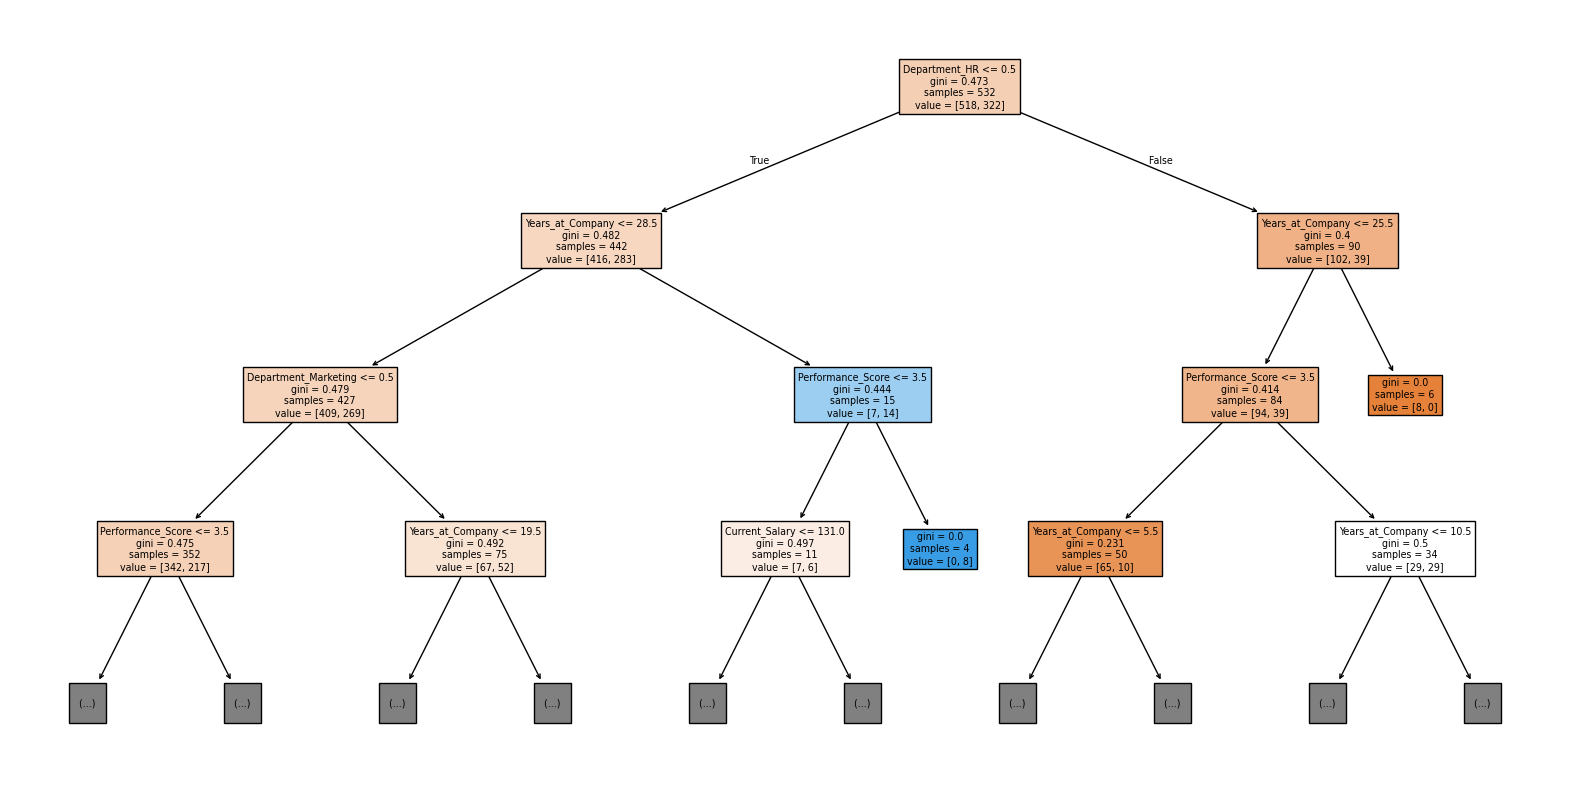

|--- Department_HR <= 0.50
|   |--- Years_at_Company <= 28.50
|   |   |--- Department_Marketing <= 0.50
|   |   |   |--- Performance_Score <= 3.50
|   |   |   |   |--- Current_Salary <= 159.50
|   |   |   |   |   |--- Years_at_Company <= 3.50
|   |   |   |   |   |   |--- Performance_Score <= 2.50
|   |   |   |   |   |   |   |--- Performance_Score <= 1.50
|   |   |   |   |   |   |   |   |--- Age <= 58.00
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Age >  58.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |--- Performance_Score >  1.50
|   |   |   |   |   |   |   |   |--- Years_at_Company <= 2.50
|   |   |   |   |   |   |   |   |   |--- Department_Sales <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Department_Sales >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Prepare data
features = ["Age", "Gender", "Department", "Years_at_Company", "Performance_Score", "Current_Salary"]
X = pd.get_dummies(data[features], drop_first=True)
y = data["Promoted"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

# Extract one tree for transparency
one_tree = rf.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(one_tree, feature_names=X.columns, filled=True, max_depth=3)
plt.show()

# Show text rules from one tree
print(export_text(one_tree, feature_names=list(X.columns)))

In [4]:
import datetime

log_records = []

def log_prediction(model, input_df):
    pred = model.predict(input_df)[0]
    timestamp = datetime.datetime.now().isoformat()
    log_entry = {
        "timestamp": timestamp,
        "input_data": input_df.to_dict(orient='records')[0],
        "prediction": int(pred)
    }
    log_records.append(log_entry)
    return pred

# Example logging of a single employee
sample_input = X_test.iloc[[0]]
log_prediction(rf, sample_input)
log_records[:2]  # Show first 2 logs

[{'timestamp': '2025-08-13T08:01:56.076409',
  'input_data': {'Age': 24,
   'Years_at_Company': 6,
   'Performance_Score': 4,
   'Current_Salary': 45,
   'Gender_Male': False,
   'Gender_Non-binary': True,
   'Department_Finance': False,
   'Department_HR': False,
   'Department_Marketing': False,
   'Department_Sales': False},
  'prediction': 1}]

In [5]:
# Anonymize Employee_ID
import hashlib

def hash_id(x):
    return hashlib.sha256(str(x).encode()).hexdigest()

data["Employee_ID"] = data["Employee_ID"].apply(hash_id)

data.head()

,Employee_ID,Age,Gender,Department,Years_at_Company,Performance_Score,Current_Salary,Promoted
0,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,30,Female,Engineering,9,5,85,1
1,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,46,Female,HR,23,3,38,0
2,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,25,Female,Finance,26,3,179,0
3,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,61,Male,Sales,21,3,199,0
4,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...,45,Male,Marketing,21,1,171,0


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Years_at_Company'].plot(kind='hist', bins=20, title='Years_at_Company')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Performance_Score'].plot(kind='hist', bins=20, title='Performance_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Current_Salary'].plot(kind='hist', bins=20, title='Current_Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Employee_ID').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Age', y='Years_at_Company', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Years_at_Company', y='Performance_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Performance_Score', y='Current_Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='Current_Salary', y='Promoted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Years_at_Company'].plot(kind='line', figsize=(8, 4), title='Years_at_Company')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Performance_Score'].plot(kind='line', figsize=(8, 4), title='Performance_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Current_Salary'].plot(kind='line', figsize=(8, 4), title='Current_Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in _df_15.groupby('Employee_ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Employee_ID')
_ = plt.ylabel('Gender')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Department'].value_counts()
    for x_label, grp in _df_16.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Department')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Employee_ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Age', y='Employee_ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Age', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Age', y='Department', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Employee_ID'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Years_at_Company', y='Employee_ID', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [6]:
# Introduce bad records
data.loc[0, "Years_at_Company"] = -3
data.loc[1, "Performance_Score"] = 7  # invalid

# Validation
def validate_row(row):
    if row["Years_at_Company"] < 0 or not (1 <= row["Performance_Score"] <= 5):
        return False
    return True

invalid_rows = data[~data.apply(validate_row, axis=1)]
print("Invalid Rows Found:\n", invalid_rows)

Invalid Rows Found:
                                          Employee_ID  Age  Gender  \
0  6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...   30  Female   
1  d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...   46  Female   

    Department  Years_at_Company  Performance_Score  Current_Salary  Promoted  
0  Engineering                -3                  5              85         1  
1           HR                23                  7              38         0  


In [7]:
# Representation by Gender
gender_counts = data["Gender"].value_counts(normalize=True) * 100
print("Gender Representation (%):\n", gender_counts)

# Representation by Department
dept_counts = data["Department"].value_counts(normalize=True) * 100
print("\nDepartment Representation (%):\n", dept_counts)

Gender Representation (%):
 Gender
Male          51.75
Female        43.00
Non-binary     5.25
Name: proportion, dtype: float64

Department Representation (%):
 Department
Engineering    34.083333
Sales          26.416667
HR             15.500000
Marketing      15.000000
Finance         9.000000
Name: proportion, dtype: float64


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
print("LR Accuracy:", accuracy_score(y_test, lr_preds))

# Example fairness metric — Demographic Parity Difference by Gender
def demographic_parity(y_true, y_pred, sensitive_values):
    groups = pd.DataFrame({"y_true": y_true, "y_pred": y_pred, "group": sensitive_values})
    rates = groups.groupby("group")["y_pred"].mean()
    return rates.max() - rates.min()

dp_diff = demographic_parity(y_test, rf.predict(X_test),
                              data.iloc[y_test.index]["Gender"])
print(f"Demographic Parity Difference (RF): {dp_diff:.3f}")

RF Accuracy: 0.7472222222222222
LR Accuracy: 0.725
Demographic Parity Difference (RF): 0.185
